# BREAST CANCER PREDICTION

Data: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

In [61]:
options(digits = 3)
#install.packages("randomForest")
#install.packages('randomFores',repos='http://cran.us.r-project.org')
library(matrixStats)
library(tidyverse)
library(caret)
library(dslabs)
data(brca)

Installing package into 'C:/Users/Shreya/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'randomFores' is not available (for R version 3.6.1)"

## Exploring the Data

In [21]:
head(brca$x)
#dimensions
dim(brca$x)
length(brca$y)
y <- brca$y
#proportion of the samples that are malignant
mean(brca$y == 'M')
#column number with the highest mean
which.max(colMeans(brca$x))
#column number with the lowest std dev
which.min(colSds(brca$x))

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
13.5,14.4,87.5,566,0.0978,0.0813,0.0666,0.04781,0.188,0.0577,...,15.11,19.3,99.7,711,0.144,0.1773,0.2390,0.1288,0.298,0.0726
13.1,15.7,85.6,520,0.1075,0.1270,0.0457,0.03110,0.197,0.0681,...,14.50,20.5,96.1,630,0.131,0.2776,0.1890,0.0728,0.318,0.0818
9.5,12.4,60.3,274,0.1024,0.0649,0.0296,0.02076,0.181,0.0690,...,10.23,15.7,65.1,315,0.132,0.1148,0.0887,0.0623,0.245,0.0777
13.0,18.4,82.6,524,0.0898,0.0377,0.0256,0.02923,0.147,0.0586,...,13.30,22.8,84.5,546,0.097,0.0462,0.0483,0.0501,0.199,0.0617
8.2,16.8,51.7,202,0.0860,0.0594,0.0159,0.00592,0.177,0.0650,...,8.96,22.0,57.3,242,0.130,0.1357,0.0688,0.0256,0.310,0.0741
12.1,14.6,78.0,449,0.1031,0.0909,0.0659,0.02749,0.168,0.0604,...,13.76,20.7,89.9,583,0.149,0.2156,0.3050,0.0655,0.275,0.0830


[1] 569  30

[1] 569

[1] 0.373

area_worst 
        24

[1] 20

### Scaling the Matrix

In [ ]:
x_centered <- sweep(brca$x, 2, colMeans(brca$x))
x_scaled <- sweep(x_centered, 2, colSds(brca$x), FUN = "/")
#sd of first column
head(apply(x_scaled, 2, sd))
#median of first column
apply(x_scaled, 2, median)

In [23]:
#Calculating the distance between all samples using the scaled matrix
dists <- dist(x_scaled)
dists <- as.matrix(dists)


#average distance between the first sample, which is benign, and other benign samples
dists_1 <- dists[1, (y == 'B')]
mean(dists_1[2:length(dists_1)])

#average distance between the first sample and malignant samples
dists_2 <- dists[1, (y == 'M')]
mean(dists_2)

[1] 4.41

[1] 7.12

### Heatmap

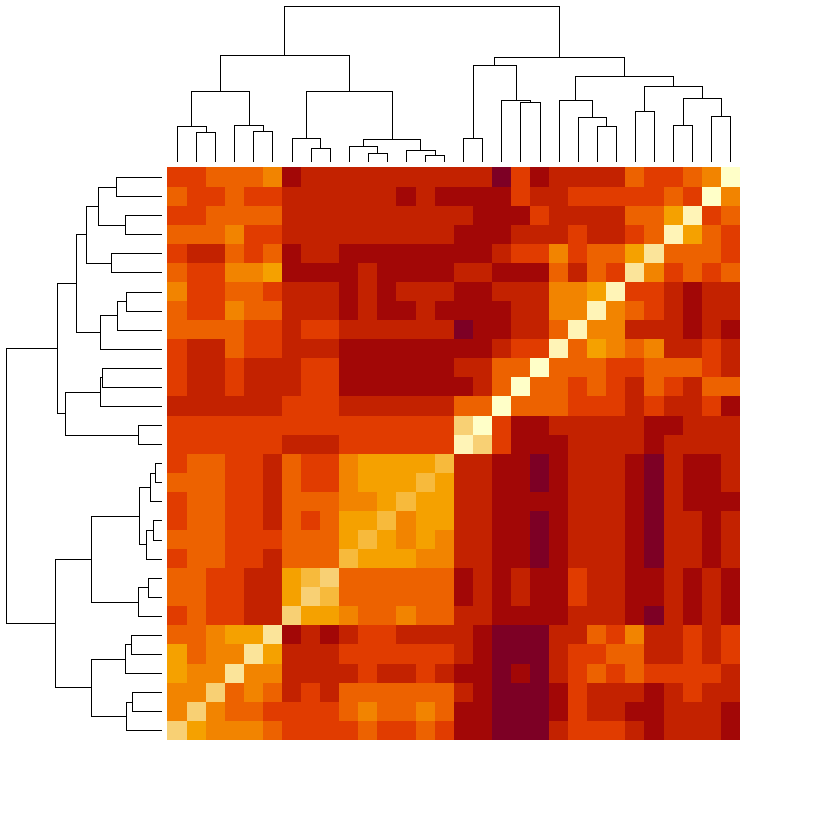

In [24]:
#heatmap of the relationship between features using the scaled matrix
d_features <- dist(t(x_scaled))
heatmap(as.matrix(d_features), labRow = NA, labCol = NA)

## Hierarchical Clustering 
Finding similar features

In [27]:
#hierarchical clustering on the 30 features and cut the tree into 5 groups
hc <- hclust(d_features)
y_hc <- cutree(hc, k=5)
split(names(y_hc), y_hc)

$`1`
 [1] "radius_mean"       "perimeter_mean"    "area_mean"        
 [4] "concavity_mean"    "concave_pts_mean"  "radius_se"        
 [7] "perimeter_se"      "area_se"           "radius_worst"     
[10] "perimeter_worst"   "area_worst"        "concave_pts_worst"

$`2`
[1] "texture_mean"  "texture_worst"

$`3`
[1] "smoothness_mean"   "compactness_mean"  "symmetry_mean"    
[4] "fractal_dim_mean"  "smoothness_worst"  "compactness_worst"
[7] "concavity_worst"   "symmetry_worst"    "fractal_dim_worst"

$`4`
[1] "texture_se"    "smoothness_se" "symmetry_se"  

$`5`
[1] "compactness_se" "concavity_se"   "concave_pts_se" "fractal_dim_se"

## Principal Component Analysis
Perform a principal component analysis of the scaled matrix

In [28]:
pca <- prcomp(x_scaled)
#proportion of variance explained by the first principal component
summary(pca)

Importance of components:
                         PC1   PC2    PC3   PC4   PC5    PC6    PC7    PC8
Standard deviation     3.644 2.386 1.6787 1.407 1.284 1.0988 0.8217 0.6904
Proportion of Variance 0.443 0.190 0.0939 0.066 0.055 0.0403 0.0225 0.0159
Cumulative Proportion  0.443 0.632 0.7264 0.792 0.847 0.8876 0.9101 0.9260
                          PC9   PC10   PC11    PC12    PC13    PC14    PC15
Standard deviation     0.6457 0.5922 0.5421 0.51104 0.49128 0.39624 0.30681
Proportion of Variance 0.0139 0.0117 0.0098 0.00871 0.00805 0.00523 0.00314
Cumulative Proportion  0.9399 0.9516 0.9614 0.97007 0.97812 0.98335 0.98649
                          PC16    PC17    PC18    PC19    PC20  PC21    PC22
Standard deviation     0.28260 0.24372 0.22939 0.22244 0.17652 0.173 0.16565
Proportion of Variance 0.00266 0.00198 0.00175 0.00165 0.00104 0.001 0.00091
Cumulative Proportion  0.98915 0.99113 0.99288 0.99453 0.99557 0.997 0.99749
                          PC23   PC24    PC25    PC26    PC27 

- PC1 and PC2 explain 63% of the variability 
- Plotting the first two principal components with color representing tumor type 

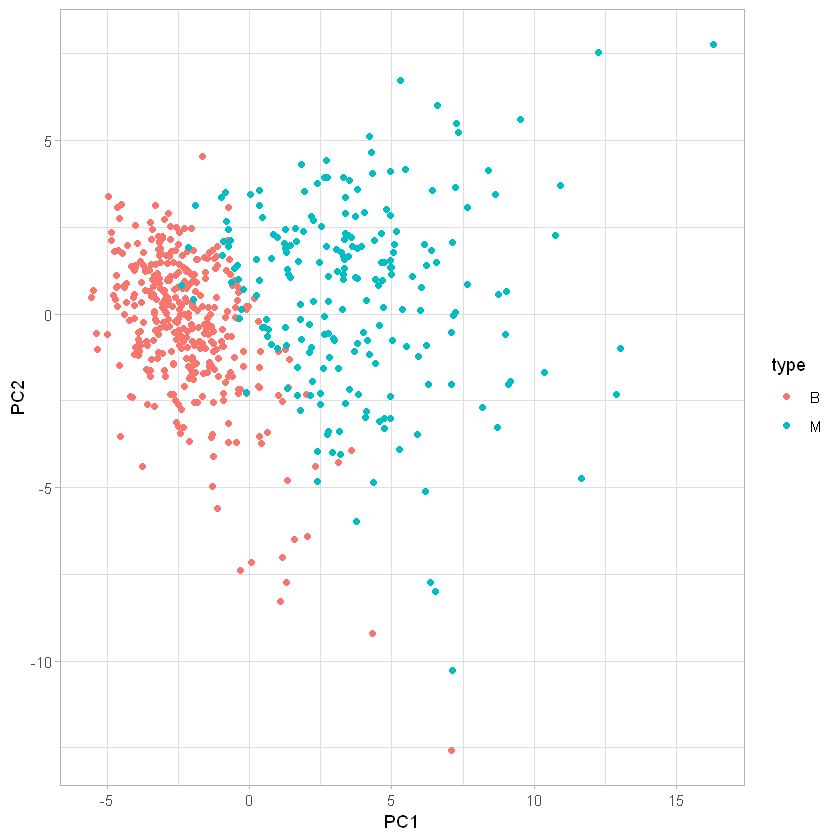

In [30]:
pcs <- data.frame(pca$x[,1:2], type = brca$y)
ggplot(pcs) + geom_point(aes(PC1, PC2, col = type)) + theme_light()

Boxplot of the first 10 PCs grouped by tumor type: 

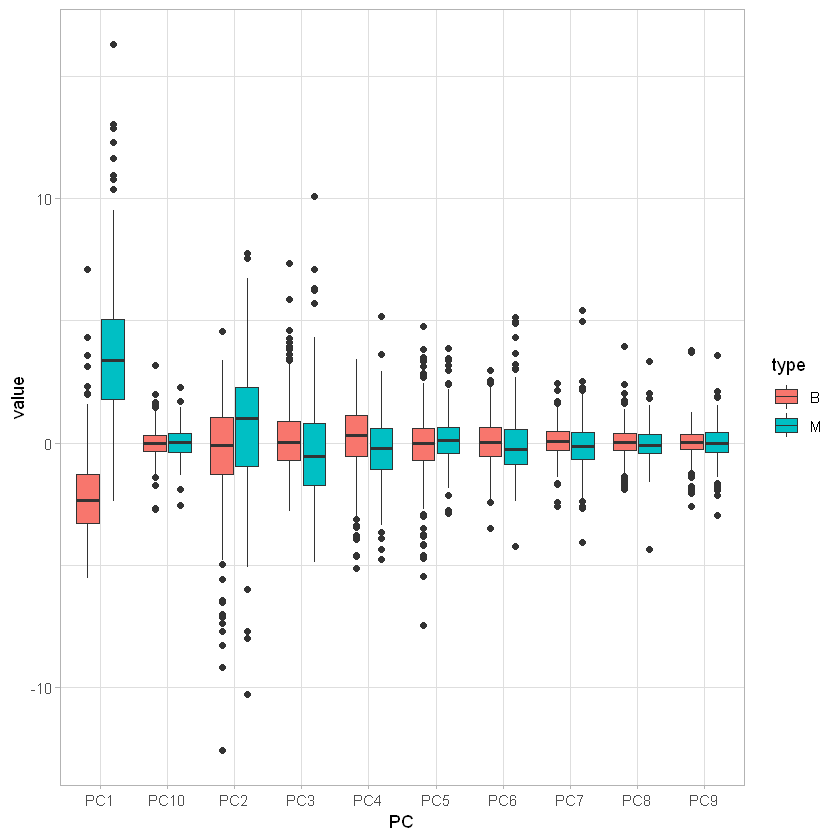

In [32]:
data.frame(type = brca$y, pca$x[,1:10]) %>%
    gather(key = "PC", value = "value", -type) %>%
    ggplot(aes(PC, value, fill = type)) +
    geom_boxplot() +
    theme_light()

## Model Building

In [34]:
#create a data partition splitting brca_y and the scaled version of the brca_x matrix into a 20% test set and 80% train
test_index <- createDataPartition(brca$y, times = 1, p = 0.2, list = FALSE)
test_x <- x_scaled[test_index,]
test_y <- brca$y[test_index]
train_x <- x_scaled[-test_index,]
train_y <- brca$y[-test_index]

#proportion of the training set that is benign
mean(train_y == 'B')
#proportion of the test set that is benign
mean(test_y == 'B')

[1] 0.628

[1] 0.626

### K-Means Clustering Model

In [71]:
suppressWarnings(set.seed(3, sample.kind = "Rounding"))

#two arguments: a matrix of observations x and a k-means object k - and assigns each row of x to a cluster from k
predict_kmeans <- function(x, k) {
    centers <- k$centers    # extract cluster centers
    # calculate distance to cluster centers
    distances <- sapply(1:nrow(x), function(i){
                        apply(centers, 1, function(y) dist(rbind(x[i,], y)))
                 })
  max.col(-t(distances))  # select cluster with min distance to center
}

In [50]:
#perform k-means clustering on the training set with 2 centers and assign the output to k
k <- kmeans(train_x, centers = 2)
kmeans_preds <- ifelse(predict_kmeans(test_x, k) == 1, "B", "M")
mean(kmeans_preds == test_y)

[1] 0.896

In [51]:
#proportion of benign and malignant tumors that are correctly identified
confusionMatrix(as.factor(test_y), as.factor(kmeans_preds))

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 68  4
         M  8 35
                                        
               Accuracy : 0.896         
                 95% CI : (0.825, 0.945)
    No Information Rate : 0.661         
    P-Value [Acc > NIR] : 5.42e-09      
                                        
                  Kappa : 0.773         
                                        
 Mcnemar's Test P-Value : 0.386         
                                        
            Sensitivity : 0.895         
            Specificity : 0.897         
         Pos Pred Value : 0.944         
         Neg Pred Value : 0.814         
             Prevalence : 0.661         
         Detection Rate : 0.591         
   Detection Prevalence : 0.626         
      Balanced Accuracy : 0.896         
                                        
       'Positive' Class : B             
                                        

### Logistic Regression Model

In [72]:
logistic_model <- suppressWarnings(train(x = train_x, y = train_y, method = "glm"))
logistic_pred <- predict(logistic_model, test_x)
mean(logistic_pred == test_y)

[1] 0.965

### LDA and QDA Models

In [53]:
#lda
lda_model <- train(x = train_x, y = train_y, method = "lda")
lda_pred <- predict(lda_model, test_x)
mean(lda_pred == test_y)

#qda
qda_model <- train(x = train_x, y = train_y, method = "qda")
qda_pred <- predict(qda_model, test_x)
mean(qda_pred == test_y)

[1] 0.974

[1] 0.965

### Loess Model

In [ ]:
suppressWarnings(set.seed(5, sample.kind = "Rounding"))
loess_model <- suppressWarnings(train(x = train_x, y = train_y, method = "gamLoess"))
loess_pred <- predict(loess_model, test_x)
mean(loess_pred == test_y)

### K-nearest Neighbors Model

In [ ]:
suppressWarnings(set.seed(7, sample.kind = "Rounding"))
tuning <- data.frame(k = seq(3, 21, 2))
train_knn <- train(train_x, train_y,
      method = "knn", 
      tuneGrid = tuning)
train_knn$bestTune
knn_pred <- predict(train_knn, test_x)
mean(knn_pred == test_y)

### Random Forest Model

In [ ]:
## set.seed(9, sample.kind = "Rounding")
## rf_model <- train(x = train_x, y = train_y, method = "rf", tuneGrid = data.frame(mtry = c(3, 5, 7, 9)), importance = TRUE)
## rf_pred <- predict(rf_model, test_x)
## mean(rf_pred == test_y)
#most important variable in the random forest model
## varImp(rf_model)

### Ensemble Model

In [69]:
predictions = data.frame(kmeans=kmeans_preds, logistic=logistic_pred, lda=lda_pred, qda=qda_pred, loess=loess_pred, knn=knn_pred)

y_hat <- ifelse(rowMeans(predictions == 'B') > 0.5, 'B', 'M')
mean(y_hat == test_y)
final_pred <- apply(predictions, 1, function(row) {
  prob = mean(row == 'B')
  ifelse(prob > 0.5, 'B', 'M')
})
mean(final_pred == test_y)

#alternate method
# ensemble <- cbind(glm = glm_preds == "B", lda = lda_preds == "B", qda = qda_preds == "B", loess = loess_preds == "B", rf = rf_preds == "B", knn = knn_preds == "B", kmeans = kmeans_preds == "B")
# 
# ensemble_preds <- ifelse(rowMeans(ensemble) > 0.5, "B", "M")
# mean(ensemble_preds == test_y)

[1] 0.974

[1] 0.974

ERROR: Error in cbind(lda = lda_preds == "B", qda = qda_preds == "B", loess = loess_preds == : object 'lda_preds' not found


In [70]:
#make a table of the accuracies of the 7 models and the accuracy of the ensemble model
predictions <- cbind(predictions, final_pred)
apply(predictions, 2, function(column) {
  mean(column == test_y)
})

kmeans   logistic        lda        qda      loess        knn final_pred 
     0.896      0.965      0.974      0.965      0.965      0.965      0.974